In [1]:
import pandas as pd
from supabase import create_client, Client
import os
import matplotlib.pyplot as plt

supabase_url = os.getenv('SUPABASE_URL')
supabase_key = os.getenv('SUPABASE_KEY') 

url: str = supabase_url
key: str = supabase_key

supabase: Client = create_client(url, key)

response = supabase.table('produtosKabum').select('*').execute()

df = pd.DataFrame(response.data)

df.head(3)

,id,data,id_kabum,categoria,subcategoria,nome,preco,preco_pix,descricao,openbox,imagem,site,url
0,264,2024-06-19T19:41:29.3192+00:00,128250,Hardware,Disco Rígido (HD),"HD Seagate IronWolf NAS, 14TB, 3.5´, SATA - ST...",3294.11,2799.99,Compre HD Seagate IronWolf NAS no KaBuM! As me...,0,,kabum,https://www.kabum.com.br/produto/128250
1,265,2024-06-19T19:41:29.432631+00:00,100916,Hardware,Disco Rígido (HD),"HD Seagate 2TB BarraCuda, 3.5', SATA - ST2000D...",494.11,419.99,"Um desempenho robusto e confiabilidade, Cache ...",0,https://images.kabum.com.br/produtos/fotos/100...,kabum,https://www.kabum.com.br/produto/100916
2,266,2024-06-19T19:41:29.517339+00:00,95803,Hardware,Disco Rígido (HD),"HD Seagate 4TB BarraCuda, 3.5', SATA - ST4000D...",823.52,699.99,O HD perfeito para armazenamento de todos os s...,0,https://images.kabum.com.br/produtos/fotos/958...,kabum,https://www.kabum.com.br/produto/95803


In [2]:
# tipos de categorias
categorias = df['categoria'].unique()
print(categorias)

# tipos de subcategorias
subcategorias = df['subcategoria'].unique()
print(subcategorias)

['Hardware' 'Computadores']
['Disco Rígido (HD)' 'Memória RAM' 'Placa de vídeo (VGA)' 'Placas-mãe'
 'SSD' 'Coolers' 'Processadores' 'Fontes' 'Notebooks']


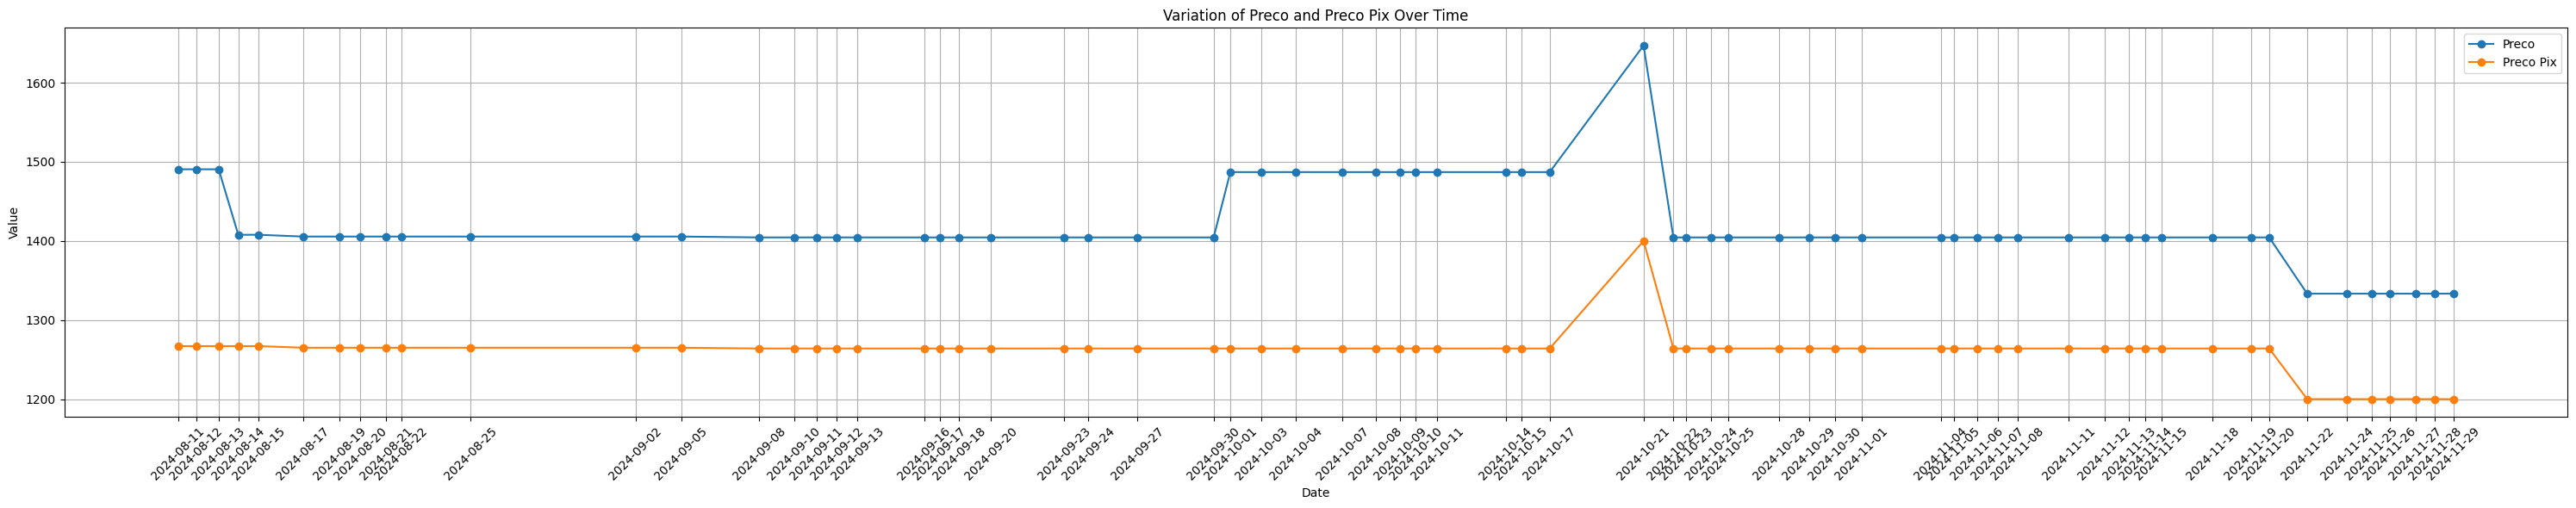

In [8]:
# Seleção do produto e criação de uma cópia para evitar o SettingWithCopyWarning
produto_selecionado = df[df['id_kabum'] == 520365].copy()

# Converter a coluna 'data' para datetime
produto_selecionado['data'] = pd.to_datetime(produto_selecionado['data'])

# Extrair a data sem a parte do tempo
produto_selecionado['data_somente'] = produto_selecionado['data'].dt.date

# Remover duplicatas com base na coluna 'data_somente'
df_sem_duplicatas = produto_selecionado.drop_duplicates(subset='data_somente')

# Ordenar o DataFrame pela coluna 'data_somente' em ordem crescente
df_ordenado = df_sem_duplicatas.sort_values(by='data_somente', ascending=True)

# Configuração do gráfico
plt.figure(figsize=(30, 6))

# Plotando 'preco'
plt.plot(df_ordenado['data'], df_ordenado['preco'], label='Preco', marker='o')

# Plotando 'preco_pix'
plt.plot(df_ordenado['data'], df_ordenado['preco_pix'], label='Preco Pix', marker='o')

# Adicionando título e rótulos
plt.title('Variation of Preco and Preco Pix Over Time')
plt.xlabel('Date')
plt.ylabel('Value')

# Adicionando uma legenda
plt.legend()

# Rotação dos rótulos para melhor legibilidade
plt.xticks(rotation=45)

# Configuração explícita dos rótulos do eixo x
plt.xticks(df_ordenado['data'], df_ordenado['data'].dt.strftime('%Y-%m-%d'), rotation=45)

# Mostrar o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()
